### question 2
### 21BDA59

### IMPORTING

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
import numpy as np
import pandas as pd

### about the dataset

In [3]:
df=pd.read_csv('caravan-insurance-challenge.csv')

In [4]:
df

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,test,33,1,2,4,8,0,7,2,0,...,0,0,0,1,0,0,0,0,0,0
9818,test,24,1,2,3,5,1,5,1,3,...,0,0,0,1,0,0,0,0,0,1
9819,test,36,1,2,3,8,1,5,1,3,...,0,0,0,1,0,0,0,1,0,0
9820,test,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

### EDA

In [6]:
df.CARAVAN.value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

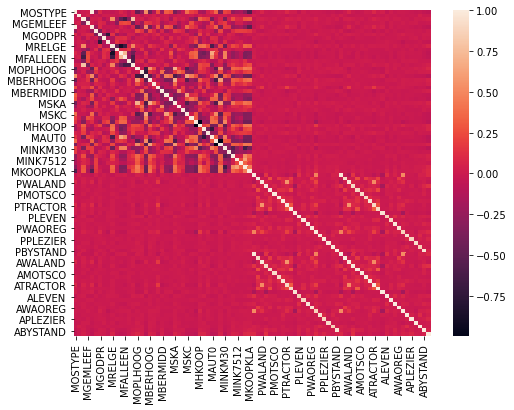

In [7]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.drop(columns=['ORIGIN']).corr());

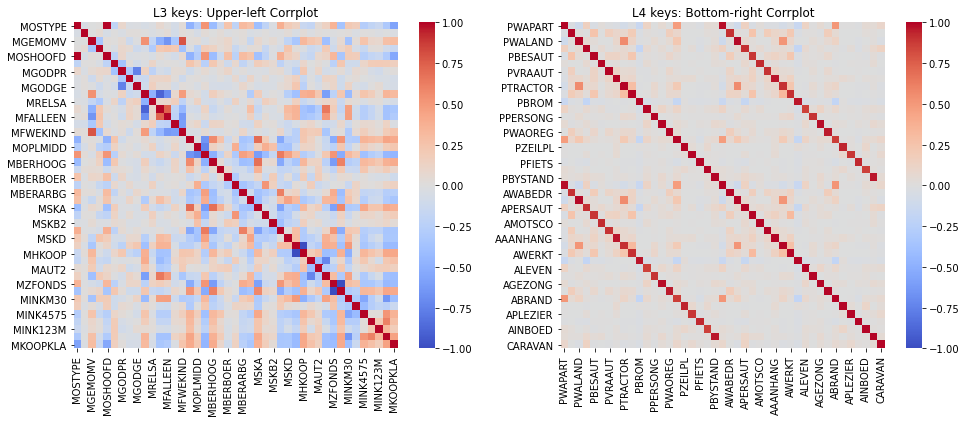

In [8]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

sns.heatmap(df.drop(columns=['ORIGIN']).iloc[:,:43].corr(), vmin=-1, vmax=1, cmap='coolwarm',ax=axes[0])
sns.heatmap(df.drop(columns=['ORIGIN']).iloc[:,43:].corr(), vmin=-1, vmax=1, cmap='coolwarm',ax=axes[1])
axes[0].set_title("L3 keys: Upper-left Corrplot")
axes[1].set_title("L4 keys: Bottom-right Corrplot");

### mODELLING

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score
from lightgbm import LGBMClassifier

In [11]:
# Drop percentage representations, keep raw number range
carav_np = df.drop(columns=df.loc[:,(df.columns.str.startswith('P'))]).copy()
carav_np.to_feather('data/reduced_cmbd.df')

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

In [12]:
train_df = df.query("ORIGIN=='train'").iloc[:,1:].copy()
test_df = df.query("ORIGIN=='test'").iloc[:,1:].copy()

In [13]:
X, y = train_df.drop(columns='CARAVAN'), train_df.CARAVAN
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
#clf_Log = LogisticRegression(solver='sag', max_iter=1000, random_state=42,verbose=2)
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_val)
print(clf_Log.coef_)
print(clf_Log.intercept_)

[LibLinear][[ 4.32977019e-02 -2.74845762e-01  2.66575603e-02  3.30686332e-01
  -1.74142780e-01 -7.45594698e-02  2.16065408e-02  7.39571371e-02
  -1.02439207e-02  2.44596989e-01  8.99602143e-02  1.70661564e-01
  -5.36892090e-02 -2.60335487e-02 -2.37440032e-02 -2.32289334e-02
  -1.37548971e-01 -2.82560096e-01  1.20153010e-01 -1.31688771e-03
  -1.21087289e-01  2.10100123e-01  7.19926184e-02  1.00142266e-01
   2.62386125e-02 -7.18963958e-02 -2.95279158e-02  1.66234074e-01
  -3.45615039e-02 -6.73660872e-01 -6.32759444e-01  2.53170407e-01
   1.68604057e-01  1.76407809e-01 -2.44289192e-01 -2.82481173e-01
   9.45015981e-02  1.05139951e-01  1.81110982e-02  5.43586569e-02
  -2.86634769e-01  1.76512037e-01  5.74342496e-02  3.61727521e-01
  -1.58782661e-01 -8.83169715e-01  1.51199820e-01  3.16409344e-01
  -9.98685432e-02 -6.29650418e-01  4.03460905e-01  3.40800179e-01
  -8.04347501e-01 -4.35005433e-03 -1.48582398e-01 -4.65048387e-01
   5.18595102e-01  1.33416502e-01  2.96929277e-01 -1.73255570e-01

### Multiple Models

In [16]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score


classifiers = [
    LogisticRegression(max_iter = 1000,random_state = 48),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),]

# Logging for Visual Comparison
log_cols=["Classifier", "F-score", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = clf.predict(X_val)
    acc = f1_score(y_val, test_predictions)
    print("F-score: {:.4%}".format(acc))
    
    test_predictions = clf.predict_proba(X_val)
    ll = log_loss(y_val, test_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
F-score: 0.0000%
Log Loss: 0.21385319482132617
KNeighborsClassifier
****Results****
F-score: 4.5455%
Log Loss: 1.6800430899304832
AdaBoostClassifier
****Results****
F-score: 2.7027%
Log Loss: 0.6440089059029053
GradientBoostingClassifier
****Results****
F-score: 5.0000%
Log Loss: 0.21539530586008077


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=3)
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
rf.fit(X_train, y_train) 
fi = rf_feat_importance(rf, X_train); fi[:10]

,cols,imp
46,PPERSAUT,0.148590
67,APERSAUT,0.116539
81,APLEZIER,0.066143
42,MKOOPKLA,0.064948
0,MOSTYPE,0.054810
58,PBRAND,0.050369
60,PPLEZIER,0.048883
4,MOSHOOFD,0.038207
17,MOPLLAAG,0.033578
15,MOPLHOOG,0.033356


In [18]:
def plot_cmroc(y_true, y_pred, classes=[0,1], normalize=True, cf_report=False):
    """Convenience function to plot confusion matrix and ROC curve """
    fig,axes = plt.subplots(1,2, figsize=(9,4))
    plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=normalize, cf_report=cf_report, ax=axes[0])
    roc_score = plot_roc(y_true, y_pred, ax=axes[1])
    fig.tight_layout()
    plt.show()
    return roc_score

In [19]:
# Define our baseline models
bc = BaggingClassifier(n_estimators=53, random_state=RS, n_jobs=-1)
ada = AdaBoostClassifier(n_estimators=53, random_state=RS)
rfc = RandomForestClassifier(n_estimators=53, random_state=RS, n_jobs=-1)
lgbm = LGBMClassifier(n_estimators=53, random_state=RS, n_jobs=-1)

NameError: name 'RS' is not defined

In [ ]:
bc_unbal = plot_cmroc(y_val, bc.fit(X_train, y_train).predict(X_val))

In [20]:
test_target = y_val.copy()
test_target.reset_index(drop=True, inplace=True)
test_target=test_target.replace({
    1:'Yes',
    0:'No'
})
predicted_target=rf.predict(X_val)
predicted_target=pd.Series(predicted_target).replace({
    1:'Yes',
    0:'No'
})

In [21]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cf_report=False,
                          title='Confusion matrix', ax=None, cmap=plt.cm.Blues, cbar=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    if cf_report:
        print(classification_report(y_true,y_pred))
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    
    if cbar:
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04) # "Magic" numbers (https://stackoverflow.com/a/26720422/10939610)
    
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [22]:
def plot_roc(y_true, y_pred, ax=None):
    """Plot ROC curve""" 
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_true, y_pred)
    roc_score = roc_auc_score(y_true,y_pred)
    
    fig, ax = (plt.gcf(), ax) if ax is not None else plt.subplots(1,1)

    ax.set_title("Receiver Operating Characteristic")
    ax.plot(false_positive_rate, true_positive_rate)
    ax.plot([0, 1], ls="--")
    ax.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax.annotate('ROC: {:.5f}'.format(roc_score), [0.75,0.05])
    ax.set_ylabel("True Positive Rate")
    ax.set_xlabel("False Positive Rate")
    fig.tight_layout()
    return roc_score

In [23]:
def feat_imps(model, X_train, plot=False, n=None):
    """ Dataframe containing each feature with its corresponding importance in the given model
    
    Args
    ----
        model : model, classifier that supports .feature_importances_ (RandomForest, AdaBoost, ect..)
        X_train : array like, training data object
        plot : boolean, if True, plots the data in the form of a bargraph
        n : int, only applicable if plot=True, number of features to plot, (default=15)
        
    Returns
    -------
        pandas DataFrame : columns = feature name, importance
    """
    
    fi_df = pd.DataFrame({'feature':X_train.columns,
                          'importance':model.feature_importances_}
                        ).sort_values(by='importance', ascending=False)
    if plot:
        fi_df[:(n if n is not None else 15)].plot.bar(x='feature',y='importance')
    else:
        return fi_df

In [24]:
def plot_cmroc(y_true, y_pred, classes=[0,1], normalize=True, cf_report=False):
    """Convenience function to plot confusion matrix and ROC curve """
    fig,axes = plt.subplots(1,2, figsize=(9,4))
    plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=normalize, cf_report=cf_report, ax=axes[0])
    roc_score = plot_roc(y_true, y_pred, ax=axes[1])
    fig.tight_layout()
    plt.show()
    return roc_score

In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

import itertools
import scipy.stats as ss

In [27]:
ros = RandomOverSampler(random_state=RS)
rus = RandomUnderSampler(random_state=RS)
smt = SMOTE(random_state=RS, n_jobs=-1)

NameError: name 'RS' is not defined

In [29]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier()
brf.fit(X_train,y_train)
brf_pred_prob = brf.predict_proba(X_val)[:, 1]
ranks=pd.DataFrame(data={
    'realClass':test_target,
    'predictedClass':predicted_target,
    'rank':brf_pred_prob
})
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,realClass,predictedClass,rank
144,Yes,No,0.98
81,No,No,0.98
870,No,No,0.97
169,No,No,0.97
1028,No,No,0.97
